# Trabalho Final - Análise de Dados com Python

Integrantes:

    1) RM351578 - RODRIGO DE DEO VIEIRA
    2) nome2
    3) nome3
    4) nome4

### Enunciado
O departamento de crédito da QuantumFinance solicitou a criação de um algoritmo para predizer o valor dos imóveis em determinada região a fim de mensurarem a provisão de crédito para o próximo ano. Assim, baseado no dataset disponível, use Regressão Linear Multivariada para predizer o valor dos imóveis com um RMSE abaixo de 69000. [dataset](https://github.com/ageron/handson-ml2/tree/master/datasets/housing)

Links úteis:

[Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

[RMSE](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error)

[Train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [4]:
# leitura dos dados
import pandas as pd
import numpy as np
import sklearn.model_selection as ms
import sklearn.linear_model as lm
import sklearn.metrics as me
import matplotlib.pyplot as plt

housing = pd.read_csv('bases/housing.csv')
housing.dropna()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
###############################
#Limpando os nulos
############################### 
print(housing['total_bedrooms'].isnull().sum()) 
housing['total_bedrooms'].fillna(housing['total_bedrooms'].median(), inplace=True)
print(housing['total_bedrooms'].isnull().sum()) 
print('-'*40) 
print(housing['median_house_value'].isnull().sum()) 
housing['median_house_value'].fillna(housing['median_house_value'].median(), inplace=True)
print(housing['median_house_value'].isnull().sum()) 
print('-'*40) 
print(housing['population'].isnull().sum()) 
housing['population'].fillna(housing['population'].median(), inplace=True)


207
0
----------------------------------------
0
0
----------------------------------------
0


In [6]:
###############################
# Classificando a proximidade com o oceano em inteiro
###############################

title_mapping = {'<1H OCEAN': 1, 'INLAND': 2, 'ISLAND': 3, 'NEAR BAY': 4, 'NEAR OCEAN': 5}
housing['ocean_proximity'] = housing['ocean_proximity'].map(title_mapping)

housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,4
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,4
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,4
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,4
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,2
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,2
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,2
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,2


In [7]:
###############################
# Classificando a media salarial por faixa
###############################

housing['median_income_band'] = pd.cut(housing['median_income'], 5)
housing[['median_income_band', 'median_house_value']].groupby(['median_income_band'], as_index=False).mean().sort_values(by='median_income_band', ascending=True)



,median_income_band,median_house_value
0,"(0.485, 3.4]",144677.822989
1,"(3.4, 6.3]",233663.729203
2,"(6.3, 9.2]",377578.909274
3,"(9.2, 12.1]",478364.250923
4,"(12.1, 15.0]",487078.190909


In [8]:
###############################
# Classificando a media salarial por faixa na tabela
###############################
condicao = housing['median_income'] <= 3
housing.loc[condicao,'median_income'] = 0
condicao = (housing['median_income'] > 3) & (housing['median_income'] <= 6)
housing.loc[condicao,'median_income'] = 1
condicao = (housing['median_income'] > 6) & (housing['median_income'] <= 9)
housing.loc[condicao,'median_income'] = 2
condicao = (housing['median_income'] > 9) & (housing['median_income'] <= 12)
housing.loc[condicao,'median_income'] = 3
condicao = (housing['median_income'] > 12) 
housing.loc[condicao,'median_income'] = 4
housing['median_income'] = housing['median_income'].astype(int)

housing    


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,median_income_band
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,2,452600.0,4,"(6.3, 9.2]"
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,2,358500.0,4,"(6.3, 9.2]"
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,2,352100.0,4,"(6.3, 9.2]"
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,1,341300.0,4,"(3.4, 6.3]"
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,1,342200.0,4,"(3.4, 6.3]"
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,0,78100.0,2,"(0.485, 3.4]"
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,0,77100.0,2,"(0.485, 3.4]"
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,0,92300.0,2,"(0.485, 3.4]"
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,0,84700.0,2,"(0.485, 3.4]"


In [9]:
###############################
# Classificando a media de familias por faixa
###############################

housing['households_band'] = pd.cut(housing['households'], 5)
housing[['households_band', 'median_house_value']].groupby(['households_band'], as_index=False).mean().sort_values(by='households_band', ascending=True)



,households_band,median_house_value
0,"(-5.081, 1217.2]",206200.579265
1,"(1217.2, 2433.4]",220007.580964
2,"(2433.4, 3649.6]",225251.231707
3,"(3649.6, 4865.8]",228852.631579
4,"(4865.8, 6082.0]",278540.200000


In [10]:
###############################
# Classificando a media salarial por faixa na tabela
###############################
housing['households'] = housing['households'].astype(int)

condicao = housing['households'] <= 1217.2
housing.loc[condicao,'households'] = 0
condicao = (housing['households'] > 1217.2) & (housing['households'] <= 2433.4)
housing.loc[condicao,'households'] = 1
condicao = (housing['households'] > 2433.4) & (housing['households'] <= 3649.6)
housing.loc[condicao,'households'] = 2
condicao = (housing['households'] > 3649.6) & (housing['households'] <= 4865.8)
housing.loc[condicao,'households'] = 3
condicao = (housing['households'] > 4865.8) 
housing.loc[condicao,'households'] = 4

housing


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,median_income_band,households_band
0,-122.23,37.88,41.0,880.0,129.0,322.0,0,2,452600.0,4,"(6.3, 9.2]","(-5.081, 1217.2]"
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,0,2,358500.0,4,"(6.3, 9.2]","(-5.081, 1217.2]"
2,-122.24,37.85,52.0,1467.0,190.0,496.0,0,2,352100.0,4,"(6.3, 9.2]","(-5.081, 1217.2]"
3,-122.25,37.85,52.0,1274.0,235.0,558.0,0,1,341300.0,4,"(3.4, 6.3]","(-5.081, 1217.2]"
4,-122.25,37.85,52.0,1627.0,280.0,565.0,0,1,342200.0,4,"(3.4, 6.3]","(-5.081, 1217.2]"
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,0,0,78100.0,2,"(0.485, 3.4]","(-5.081, 1217.2]"
20636,-121.21,39.49,18.0,697.0,150.0,356.0,0,0,77100.0,2,"(0.485, 3.4]","(-5.081, 1217.2]"
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,0,0,92300.0,2,"(0.485, 3.4]","(-5.081, 1217.2]"
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,0,0,84700.0,2,"(0.485, 3.4]","(-5.081, 1217.2]"


In [11]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           20640 non-null  float64 
 1   latitude            20640 non-null  float64 
 2   housing_median_age  20640 non-null  float64 
 3   total_rooms         20640 non-null  float64 
 4   total_bedrooms      20640 non-null  float64 
 5   population          20640 non-null  float64 
 6   households          20640 non-null  int32   
 7   median_income       20640 non-null  int32   
 8   median_house_value  20640 non-null  float64 
 9   ocean_proximity     20640 non-null  int64   
 10  median_income_band  20640 non-null  category
 11  households_band     20640 non-null  category
dtypes: category(2), float64(7), int32(2), int64(1)
memory usage: 1.5 MB


In [12]:
###############################
# Classificando a populacao por faixa
###############################
housing['population_band'] = pd.cut(housing['population'], 5)
housing[['population_band', 'median_house_value']].groupby(['population_band'], as_index=False).mean().sort_values(by='population_band', ascending=True)


,population_band,median_house_value
0,"(-32.679, 7138.8]",206797.567107
1,"(7138.8, 14274.6]",216856.084112
2,"(14274.6, 21410.4]",278400.000000
3,"(21410.4, 28546.2]",NaN
4,"(28546.2, 35682.0]",126600.000000


In [13]:
###############################
# Classificando a media populacao por faixa na tabela
###############################
housing['population'] = housing['population'].astype(int)
condicao = housing['population'] <= 7138.8
housing.loc[condicao,'population'] = 0
condicao = (housing['population'] > 7138.8) & (housing['population'] <= 14274.6)
housing.loc[condicao,'population'] = 1
condicao = (housing['population'] > 14274.6) & (housing['population'] <= 21410.4)
housing.loc[condicao,'population'] = 2
condicao = (housing['population'] > 21410.4) & (housing['population'] <= 28546.2)
housing.loc[condicao,'population'] = 3
condicao = (housing['population'] > 28546.2) 
housing.loc[condicao,'population'] = 4



housing


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,median_income_band,households_band,population_band
0,-122.23,37.88,41.0,880.0,129.0,0,0,2,452600.0,4,"(6.3, 9.2]","(-5.081, 1217.2]","(-32.679, 7138.8]"
1,-122.22,37.86,21.0,7099.0,1106.0,0,0,2,358500.0,4,"(6.3, 9.2]","(-5.081, 1217.2]","(-32.679, 7138.8]"
2,-122.24,37.85,52.0,1467.0,190.0,0,0,2,352100.0,4,"(6.3, 9.2]","(-5.081, 1217.2]","(-32.679, 7138.8]"
3,-122.25,37.85,52.0,1274.0,235.0,0,0,1,341300.0,4,"(3.4, 6.3]","(-5.081, 1217.2]","(-32.679, 7138.8]"
4,-122.25,37.85,52.0,1627.0,280.0,0,0,1,342200.0,4,"(3.4, 6.3]","(-5.081, 1217.2]","(-32.679, 7138.8]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,0,0,0,78100.0,2,"(0.485, 3.4]","(-5.081, 1217.2]","(-32.679, 7138.8]"
20636,-121.21,39.49,18.0,697.0,150.0,0,0,0,77100.0,2,"(0.485, 3.4]","(-5.081, 1217.2]","(-32.679, 7138.8]"
20637,-121.22,39.43,17.0,2254.0,485.0,0,0,0,92300.0,2,"(0.485, 3.4]","(-5.081, 1217.2]","(-32.679, 7138.8]"
20638,-121.32,39.43,18.0,1860.0,409.0,0,0,0,84700.0,2,"(0.485, 3.4]","(-5.081, 1217.2]","(-32.679, 7138.8]"


In [14]:
###############################
# Classificando banheiros por faixa
###############################
housing['total_bedrooms_band'] = pd.cut(housing['total_bedrooms'], 5)
housing[['total_bedrooms_band', 'median_house_value']].groupby(['total_bedrooms_band'], as_index=False).mean().sort_values(by='total_bedrooms_band', ascending=True)


,total_bedrooms_band,median_house_value
0,"(-5.444, 1289.8]",206254.663377
1,"(1289.8, 2578.6]",217928.917346
2,"(2578.6, 3867.4]",225566.688172
3,"(3867.4, 5156.2]",214800.000000
4,"(5156.2, 6445.0]",278540.200000


In [15]:
###############################
# Classificando a banheiros por faixa na tabela
###############################
condicao = housing['total_bedrooms'] <= 1289.8
housing.loc[condicao,'total_bedrooms'] = 0
condicao = (housing['total_bedrooms'] > 1289.8) & (housing['total_bedrooms'] <= 2578.6)
housing.loc[condicao,'total_bedrooms'] = 1
condicao = (housing['total_bedrooms'] > 2578.6) & (housing['total_bedrooms'] <= 3867.4)
housing.loc[condicao,'total_bedrooms'] = 2
condicao = (housing['total_bedrooms'] > 3867.4) & (housing['total_bedrooms'] <= 5156.2)
housing.loc[condicao,'total_bedrooms'] = 3
condicao = (housing['total_bedrooms'] > 5156.2) 
housing.loc[condicao,'total_bedrooms'] = 4

housing['total_bedrooms'] = housing['total_bedrooms'].astype(int)




In [16]:
housing.describe()
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   longitude            20640 non-null  float64 
 1   latitude             20640 non-null  float64 
 2   housing_median_age   20640 non-null  float64 
 3   total_rooms          20640 non-null  float64 
 4   total_bedrooms       20640 non-null  int32   
 5   population           20640 non-null  int32   
 6   households           20640 non-null  int32   
 7   median_income        20640 non-null  int32   
 8   median_house_value   20640 non-null  float64 
 9   ocean_proximity      20640 non-null  int64   
 10  median_income_band   20640 non-null  category
 11  households_band      20640 non-null  category
 12  population_band      20640 non-null  category
 13  total_bedrooms_band  20640 non-null  category
dtypes: category(4), float64(5), int32(4), int64(1)
memory usage: 1.3 MB


In [17]:
###############################
# Classificando quartos por faixa
###############################

housing['total_rooms_band'] = pd.cut(housing['total_bedrooms'], 5)
housing[['total_rooms_band', 'median_house_value']].groupby(['total_rooms_band'], as_index=False).mean().sort_values(by='total_rooms_band', ascending=True)


,total_rooms_band,median_house_value
0,"(-0.004, 0.8]",206254.663377
1,"(0.8, 1.6]",217928.917346
2,"(1.6, 2.4]",225566.688172
3,"(2.4, 3.2]",214800.000000
4,"(3.2, 4.0]",278540.200000


In [18]:
###############################
# Classificando a quartps por faixa na tabela
###############################
housing['total_rooms'] = housing['total_rooms'].astype(int)

condicao = housing['total_rooms'] <= 0.8
housing.loc[condicao,'total_rooms'] = 0
condicao = (housing['total_rooms'] > 0.8) & (housing['total_rooms'] <= 1.6)
housing.loc[condicao,'total_rooms'] = 1
condicao = (housing['total_rooms'] > 1.6) & (housing['total_rooms'] <= 2.4)
housing.loc[condicao,'total_rooms'] = 2
condicao = (housing['total_rooms'] > 2.4) & (housing['total_rooms'] <= 3.2)
housing.loc[condicao,'total_rooms'] = 3
condicao = (housing['total_rooms'] > 3.2) 
housing.loc[condicao,'total_rooms'] = 4
housing['total_rooms'] = housing['total_rooms'].astype(int)

housing


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,median_income_band,households_band,population_band,total_bedrooms_band,total_rooms_band
0,-122.23,37.88,41.0,4,0,0,0,2,452600.0,4,"(6.3, 9.2]","(-5.081, 1217.2]","(-32.679, 7138.8]","(-5.444, 1289.8]","(-0.004, 0.8]"
1,-122.22,37.86,21.0,4,0,0,0,2,358500.0,4,"(6.3, 9.2]","(-5.081, 1217.2]","(-32.679, 7138.8]","(-5.444, 1289.8]","(-0.004, 0.8]"
2,-122.24,37.85,52.0,4,0,0,0,2,352100.0,4,"(6.3, 9.2]","(-5.081, 1217.2]","(-32.679, 7138.8]","(-5.444, 1289.8]","(-0.004, 0.8]"
3,-122.25,37.85,52.0,4,0,0,0,1,341300.0,4,"(3.4, 6.3]","(-5.081, 1217.2]","(-32.679, 7138.8]","(-5.444, 1289.8]","(-0.004, 0.8]"
4,-122.25,37.85,52.0,4,0,0,0,1,342200.0,4,"(3.4, 6.3]","(-5.081, 1217.2]","(-32.679, 7138.8]","(-5.444, 1289.8]","(-0.004, 0.8]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,4,0,0,0,0,78100.0,2,"(0.485, 3.4]","(-5.081, 1217.2]","(-32.679, 7138.8]","(-5.444, 1289.8]","(-0.004, 0.8]"
20636,-121.21,39.49,18.0,4,0,0,0,0,77100.0,2,"(0.485, 3.4]","(-5.081, 1217.2]","(-32.679, 7138.8]","(-5.444, 1289.8]","(-0.004, 0.8]"
20637,-121.22,39.43,17.0,4,0,0,0,0,92300.0,2,"(0.485, 3.4]","(-5.081, 1217.2]","(-32.679, 7138.8]","(-5.444, 1289.8]","(-0.004, 0.8]"
20638,-121.32,39.43,18.0,4,0,0,0,0,84700.0,2,"(0.485, 3.4]","(-5.081, 1217.2]","(-32.679, 7138.8]","(-5.444, 1289.8]","(-0.004, 0.8]"


In [19]:
###############################
# Classificando idades medias por faixa
###############################
housing['housing_median_age_band'] = pd.cut(housing['housing_median_age'], 5)
housing[['housing_median_age_band', 'median_house_value']].groupby(['housing_median_age_band'], as_index=False).mean().sort_values(by='housing_median_age_band', ascending=True)


,housing_median_age_band,median_house_value
0,"(0.949, 11.2]",197427.127811
1,"(11.2, 21.4]",192578.359439
2,"(21.4, 31.6]",207437.505757
3,"(31.6, 41.8]",206116.219248
4,"(41.8, 52.0]",231585.479620


In [20]:
###############################
# Classificando a media de idade por faixa na tabela
###############################
housing['housing_median_age'] = housing['housing_median_age'].astype(int)

condicao = housing['housing_median_age'] <= 11.2
housing.loc[condicao,'housing_median_age'] = 0
condicao = (housing['housing_median_age'] > 11.2) & (housing['housing_median_age'] <= 21.4)
housing.loc[condicao,'housing_median_age'] = 1
condicao = (housing['housing_median_age'] > 21.4) & (housing['housing_median_age'] <= 31.6)
housing.loc[condicao,'housing_median_age'] = 2
condicao = (housing['housing_median_age'] > 31.6) & (housing['housing_median_age'] <= 41.8)
housing.loc[condicao,'housing_median_age'] = 3
condicao = (housing['housing_median_age'] > 41.8) 
housing.loc[condicao,'housing_median_age'] = 4

housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,median_income_band,households_band,population_band,total_bedrooms_band,total_rooms_band,housing_median_age_band
0,-122.23,37.88,3,4,0,0,0,2,452600.0,4,"(6.3, 9.2]","(-5.081, 1217.2]","(-32.679, 7138.8]","(-5.444, 1289.8]","(-0.004, 0.8]","(31.6, 41.8]"
1,-122.22,37.86,1,4,0,0,0,2,358500.0,4,"(6.3, 9.2]","(-5.081, 1217.2]","(-32.679, 7138.8]","(-5.444, 1289.8]","(-0.004, 0.8]","(11.2, 21.4]"
2,-122.24,37.85,4,4,0,0,0,2,352100.0,4,"(6.3, 9.2]","(-5.081, 1217.2]","(-32.679, 7138.8]","(-5.444, 1289.8]","(-0.004, 0.8]","(41.8, 52.0]"
3,-122.25,37.85,4,4,0,0,0,1,341300.0,4,"(3.4, 6.3]","(-5.081, 1217.2]","(-32.679, 7138.8]","(-5.444, 1289.8]","(-0.004, 0.8]","(41.8, 52.0]"
4,-122.25,37.85,4,4,0,0,0,1,342200.0,4,"(3.4, 6.3]","(-5.081, 1217.2]","(-32.679, 7138.8]","(-5.444, 1289.8]","(-0.004, 0.8]","(41.8, 52.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,2,4,0,0,0,0,78100.0,2,"(0.485, 3.4]","(-5.081, 1217.2]","(-32.679, 7138.8]","(-5.444, 1289.8]","(-0.004, 0.8]","(21.4, 31.6]"
20636,-121.21,39.49,1,4,0,0,0,0,77100.0,2,"(0.485, 3.4]","(-5.081, 1217.2]","(-32.679, 7138.8]","(-5.444, 1289.8]","(-0.004, 0.8]","(11.2, 21.4]"
20637,-121.22,39.43,1,4,0,0,0,0,92300.0,2,"(0.485, 3.4]","(-5.081, 1217.2]","(-32.679, 7138.8]","(-5.444, 1289.8]","(-0.004, 0.8]","(11.2, 21.4]"
20638,-121.32,39.43,1,4,0,0,0,0,84700.0,2,"(0.485, 3.4]","(-5.081, 1217.2]","(-32.679, 7138.8]","(-5.444, 1289.8]","(-0.004, 0.8]","(11.2, 21.4]"


In [21]:
###############################
# Classificando latitude por faixa
###############################
housing['latitude_band'] = pd.cut(housing['latitude'], 5)
housing[['latitude_band', 'median_house_value']].groupby(['latitude_band'], as_index=False).mean().sort_values(by='latitude_band', ascending=True)


,latitude_band,median_house_value
0,"(32.531, 34.422]",222890.271353
1,"(34.422, 36.304]",140314.513514
2,"(36.304, 38.186]",224096.343271
3,"(38.186, 40.068]",141395.022422
4,"(40.068, 41.95]",84499.748756


In [22]:
###############################
# Classificando a latitude por faixa na tabela
###############################
condicao = housing['latitude'] <= 34.422
housing.loc[condicao,'latitude'] = 0
condicao = (housing['latitude'] > 34.422) & (housing['latitude'] <= 36.304)
housing.loc[condicao,'latitude'] = 1
condicao = (housing['latitude'] > 36.304) & (housing['latitude'] <= 38.186)
housing.loc[condicao,'latitude'] = 2
condicao = (housing['latitude'] > 38.186) & (housing['latitude'] <= 40.068)
housing.loc[condicao,'latitude'] = 3
condicao = (housing['latitude'] > 40.068) 
housing.loc[condicao,'latitude'] = 4

housing['latitude'] = housing['latitude'].astype(int)

housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,median_income_band,households_band,population_band,total_bedrooms_band,total_rooms_band,housing_median_age_band,latitude_band
0,-122.23,2,3,4,0,0,0,2,452600.0,4,"(6.3, 9.2]","(-5.081, 1217.2]","(-32.679, 7138.8]","(-5.444, 1289.8]","(-0.004, 0.8]","(31.6, 41.8]","(36.304, 38.186]"
1,-122.22,2,1,4,0,0,0,2,358500.0,4,"(6.3, 9.2]","(-5.081, 1217.2]","(-32.679, 7138.8]","(-5.444, 1289.8]","(-0.004, 0.8]","(11.2, 21.4]","(36.304, 38.186]"
2,-122.24,2,4,4,0,0,0,2,352100.0,4,"(6.3, 9.2]","(-5.081, 1217.2]","(-32.679, 7138.8]","(-5.444, 1289.8]","(-0.004, 0.8]","(41.8, 52.0]","(36.304, 38.186]"
3,-122.25,2,4,4,0,0,0,1,341300.0,4,"(3.4, 6.3]","(-5.081, 1217.2]","(-32.679, 7138.8]","(-5.444, 1289.8]","(-0.004, 0.8]","(41.8, 52.0]","(36.304, 38.186]"
4,-122.25,2,4,4,0,0,0,1,342200.0,4,"(3.4, 6.3]","(-5.081, 1217.2]","(-32.679, 7138.8]","(-5.444, 1289.8]","(-0.004, 0.8]","(41.8, 52.0]","(36.304, 38.186]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,3,2,4,0,0,0,0,78100.0,2,"(0.485, 3.4]","(-5.081, 1217.2]","(-32.679, 7138.8]","(-5.444, 1289.8]","(-0.004, 0.8]","(21.4, 31.6]","(38.186, 40.068]"
20636,-121.21,3,1,4,0,0,0,0,77100.0,2,"(0.485, 3.4]","(-5.081, 1217.2]","(-32.679, 7138.8]","(-5.444, 1289.8]","(-0.004, 0.8]","(11.2, 21.4]","(38.186, 40.068]"
20637,-121.22,3,1,4,0,0,0,0,92300.0,2,"(0.485, 3.4]","(-5.081, 1217.2]","(-32.679, 7138.8]","(-5.444, 1289.8]","(-0.004, 0.8]","(11.2, 21.4]","(38.186, 40.068]"
20638,-121.32,3,1,4,0,0,0,0,84700.0,2,"(0.485, 3.4]","(-5.081, 1217.2]","(-32.679, 7138.8]","(-5.444, 1289.8]","(-0.004, 0.8]","(11.2, 21.4]","(38.186, 40.068]"


In [23]:
###############################
# Classificando longitude por faixa
###############################
housing['longitude_band'] = pd.cut(housing['longitude'], 5)
housing[['longitude_band', 'median_house_value']].groupby(['longitude_band'], as_index=False).mean().sort_values(by='longitude_band', ascending=True)


,longitude_band,median_house_value
0,"(-124.36, -122.342]",245828.016064
1,"(-122.342, -120.334]",197014.400032
2,"(-120.334, -118.326]",226531.788457
3,"(-118.326, -116.318]",200037.924232
4,"(-116.318, -114.31]",79986.046512


In [24]:
###############################
# Classificando a longitude por faixa na tabela
###############################
condicao = housing['longitude'] <= -122.342
housing.loc[condicao,'longitude'] = 0
condicao = (housing['longitude'] > -122.342) & (housing['longitude'] <=  -120.334)
housing.loc[condicao,'longitude'] = 1
condicao = (housing['longitude'] >  -120.334) & (housing['longitude'] <= -118.326)
housing.loc[condicao,'longitude'] = 2
condicao = (housing['longitude'] > -118.326) & (housing['longitude'] <=  -116.318)
housing.loc[condicao,'longitude'] = 3
condicao = (housing['longitude'] >  -116.318) 
housing.loc[condicao,'longitude'] = 4

housing['longitude'] = housing['longitude'].astype(int)

housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,median_income_band,households_band,population_band,total_bedrooms_band,total_rooms_band,housing_median_age_band,latitude_band,longitude_band
0,4,2,3,4,0,0,0,2,452600.0,4,"(6.3, 9.2]","(-5.081, 1217.2]","(-32.679, 7138.8]","(-5.444, 1289.8]","(-0.004, 0.8]","(31.6, 41.8]","(36.304, 38.186]","(-122.342, -120.334]"
1,4,2,1,4,0,0,0,2,358500.0,4,"(6.3, 9.2]","(-5.081, 1217.2]","(-32.679, 7138.8]","(-5.444, 1289.8]","(-0.004, 0.8]","(11.2, 21.4]","(36.304, 38.186]","(-122.342, -120.334]"
2,4,2,4,4,0,0,0,2,352100.0,4,"(6.3, 9.2]","(-5.081, 1217.2]","(-32.679, 7138.8]","(-5.444, 1289.8]","(-0.004, 0.8]","(41.8, 52.0]","(36.304, 38.186]","(-122.342, -120.334]"
3,4,2,4,4,0,0,0,1,341300.0,4,"(3.4, 6.3]","(-5.081, 1217.2]","(-32.679, 7138.8]","(-5.444, 1289.8]","(-0.004, 0.8]","(41.8, 52.0]","(36.304, 38.186]","(-122.342, -120.334]"
4,4,2,4,4,0,0,0,1,342200.0,4,"(3.4, 6.3]","(-5.081, 1217.2]","(-32.679, 7138.8]","(-5.444, 1289.8]","(-0.004, 0.8]","(41.8, 52.0]","(36.304, 38.186]","(-122.342, -120.334]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,4,3,2,4,0,0,0,0,78100.0,2,"(0.485, 3.4]","(-5.081, 1217.2]","(-32.679, 7138.8]","(-5.444, 1289.8]","(-0.004, 0.8]","(21.4, 31.6]","(38.186, 40.068]","(-122.342, -120.334]"
20636,4,3,1,4,0,0,0,0,77100.0,2,"(0.485, 3.4]","(-5.081, 1217.2]","(-32.679, 7138.8]","(-5.444, 1289.8]","(-0.004, 0.8]","(11.2, 21.4]","(38.186, 40.068]","(-122.342, -120.334]"
20637,4,3,1,4,0,0,0,0,92300.0,2,"(0.485, 3.4]","(-5.081, 1217.2]","(-32.679, 7138.8]","(-5.444, 1289.8]","(-0.004, 0.8]","(11.2, 21.4]","(38.186, 40.068]","(-122.342, -120.334]"
20638,4,3,1,4,0,0,0,0,84700.0,2,"(0.485, 3.4]","(-5.081, 1217.2]","(-32.679, 7138.8]","(-5.444, 1289.8]","(-0.004, 0.8]","(11.2, 21.4]","(38.186, 40.068]","(-122.342, -120.334]"


In [25]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,median_income_band,households_band,population_band,total_bedrooms_band,total_rooms_band,housing_median_age_band,latitude_band,longitude_band
0,4,2,3,4,0,0,0,2,452600.0,4,"(6.3, 9.2]","(-5.081, 1217.2]","(-32.679, 7138.8]","(-5.444, 1289.8]","(-0.004, 0.8]","(31.6, 41.8]","(36.304, 38.186]","(-122.342, -120.334]"
1,4,2,1,4,0,0,0,2,358500.0,4,"(6.3, 9.2]","(-5.081, 1217.2]","(-32.679, 7138.8]","(-5.444, 1289.8]","(-0.004, 0.8]","(11.2, 21.4]","(36.304, 38.186]","(-122.342, -120.334]"
2,4,2,4,4,0,0,0,2,352100.0,4,"(6.3, 9.2]","(-5.081, 1217.2]","(-32.679, 7138.8]","(-5.444, 1289.8]","(-0.004, 0.8]","(41.8, 52.0]","(36.304, 38.186]","(-122.342, -120.334]"
3,4,2,4,4,0,0,0,1,341300.0,4,"(3.4, 6.3]","(-5.081, 1217.2]","(-32.679, 7138.8]","(-5.444, 1289.8]","(-0.004, 0.8]","(41.8, 52.0]","(36.304, 38.186]","(-122.342, -120.334]"
4,4,2,4,4,0,0,0,1,342200.0,4,"(3.4, 6.3]","(-5.081, 1217.2]","(-32.679, 7138.8]","(-5.444, 1289.8]","(-0.004, 0.8]","(41.8, 52.0]","(36.304, 38.186]","(-122.342, -120.334]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,4,3,2,4,0,0,0,0,78100.0,2,"(0.485, 3.4]","(-5.081, 1217.2]","(-32.679, 7138.8]","(-5.444, 1289.8]","(-0.004, 0.8]","(21.4, 31.6]","(38.186, 40.068]","(-122.342, -120.334]"
20636,4,3,1,4,0,0,0,0,77100.0,2,"(0.485, 3.4]","(-5.081, 1217.2]","(-32.679, 7138.8]","(-5.444, 1289.8]","(-0.004, 0.8]","(11.2, 21.4]","(38.186, 40.068]","(-122.342, -120.334]"
20637,4,3,1,4,0,0,0,0,92300.0,2,"(0.485, 3.4]","(-5.081, 1217.2]","(-32.679, 7138.8]","(-5.444, 1289.8]","(-0.004, 0.8]","(11.2, 21.4]","(38.186, 40.068]","(-122.342, -120.334]"
20638,4,3,1,4,0,0,0,0,84700.0,2,"(0.485, 3.4]","(-5.081, 1217.2]","(-32.679, 7138.8]","(-5.444, 1289.8]","(-0.004, 0.8]","(11.2, 21.4]","(38.186, 40.068]","(-122.342, -120.334]"


In [26]:
###############################
# Removendo as colunas de faixa
###############################

housing = housing.drop('households_band',axis=1)
housing = housing.drop('median_income_band',axis=1)
housing = housing.drop('population_band',axis=1)
housing = housing.drop('total_bedrooms_band',axis=1)
housing = housing.drop('total_rooms_band',axis=1)
housing = housing.drop('housing_median_age_band',axis=1)
housing = housing.drop('latitude_band',axis=1)
housing = housing.drop('longitude_band',axis=1)


housing.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  int32  
 1   latitude            20640 non-null  int32  
 2   housing_median_age  20640 non-null  int32  
 3   total_rooms         20640 non-null  int32  
 4   total_bedrooms      20640 non-null  int32  
 5   population          20640 non-null  int32  
 6   households          20640 non-null  int32  
 7   median_income       20640 non-null  int32  
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  int64  
dtypes: float64(1), int32(8), int64(1)
memory usage: 967.6 KB


In [27]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,4,2,3,4,0,0,0,2,452600.0,4
1,4,2,1,4,0,0,0,2,358500.0,4
2,4,2,4,4,0,0,0,2,352100.0,4
3,4,2,4,4,0,0,0,1,341300.0,4
4,4,2,4,4,0,0,0,1,342200.0,4
...,...,...,...,...,...,...,...,...,...,...
20635,4,3,2,4,0,0,0,0,78100.0,2
20636,4,3,1,4,0,0,0,0,77100.0,2
20637,4,3,1,4,0,0,0,0,92300.0,2
20638,4,3,1,4,0,0,0,0,84700.0,2


In [28]:
###############################
# Criando meu X e Y
###############################
X = housing.iloc[:,:]
X = X.drop(["median_house_value"],axis=1) 
Y = pd.DataFrame(housing.iloc[:,8])

In [29]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,4,2,3,4,0,0,0,2,4
1,4,2,1,4,0,0,0,2,4
2,4,2,4,4,0,0,0,2,4
3,4,2,4,4,0,0,0,1,4
4,4,2,4,4,0,0,0,1,4
...,...,...,...,...,...,...,...,...,...
20635,4,3,2,4,0,0,0,0,2
20636,4,3,1,4,0,0,0,0,2
20637,4,3,1,4,0,0,0,0,2
20638,4,3,1,4,0,0,0,0,2


In [30]:
Y

,median_house_value
0,452600.0
1,358500.0
2,352100.0
3,341300.0
4,342200.0
...,...
20635,78100.0
20636,77100.0
20637,92300.0
20638,84700.0


In [31]:
###############################
# Variaveis Dummy
###############################
#X_dummies = pd.get_dummies(X)

#X_dummies


In [32]:
###############################
# Separar dados em Treino e Teste
###############################
X_train, X_test, Y_train, Y_test = ms.train_test_split(X,Y,test_size = 1/5,random_state = 0)


In [33]:
Y_test

,median_house_value
14740,136900.0
10101,241300.0
20566,200700.0
2670,72500.0
15709,460000.0
...,...
6655,169500.0
3505,204600.0
1919,128600.0
1450,259500.0


In [34]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12069,4,0,0,4,0,0,0,1,2
15925,4,2,4,4,0,0,0,1,4
11162,4,0,2,4,0,0,0,1,1
4904,4,0,3,4,0,0,0,0,1
4683,4,0,4,4,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...
13123,4,3,1,4,0,0,0,1,2
19648,4,2,2,4,0,0,0,0,2
9845,4,2,2,4,0,0,0,1,5
10799,4,0,3,4,0,0,0,1,1


In [35]:
X_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
14740,4,0,2,4,0,0,0,1,5
10101,4,0,3,4,0,0,0,1,1
20566,4,3,2,4,0,0,0,1,2
2670,4,0,3,4,0,0,0,0,2
15709,4,2,2,4,0,0,0,1,4
...,...,...,...,...,...,...,...,...,...
6655,4,0,3,4,0,0,0,0,1
3505,4,0,3,4,0,0,0,1,1
1919,4,3,0,4,0,0,0,1,2
1450,4,2,1,4,0,0,0,2,2


In [36]:
Y_train

,median_house_value
12069,500001.0
15925,270000.0
11162,196100.0
4904,118800.0
4683,225000.0
...,...
13123,144600.0
19648,159400.0
9845,289300.0
10799,484600.0


In [37]:
###############################
#Limpando os nulos
############################### 
print(X_train.isnull().sum()) 
print('-'*40) 
print(Y_train.isnull().sum())
print('-'*40) 
print(X_test.isnull().sum())

X_train['total_bedrooms'].fillna(X_train['total_bedrooms'].median(), inplace=True)
X_test['total_bedrooms'].fillna(X_test['total_bedrooms'].median(), inplace=True)

print('-'*40) 
print(X_train.isnull().sum()) 
print('-'*40) 
print(X_test.isnull().sum())


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
dtype: int64
----------------------------------------
median_house_value    0
dtype: int64
----------------------------------------
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
dtype: int64
----------------------------------------
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
dtype: int64
----------------------------------------
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms  

In [38]:
###############################
# Treinando o modelo
###############################

regressor = lm.LinearRegression()
regressor.fit(X_train,Y_train)


LinearRegression()

In [39]:
###############################
# Previsao
###############################
np.set_printoptions(precision=2)

Y_pred = pd.DataFrame(regressor.predict(X_test))

Y_pred = Y_pred.rename(columns={0: 'Y_pred'})

Y_test = pd.DataFrame(Y_test)

Y_test = Y_test.rename(columns={'median_house_value': 'Y_test'})

Y_test = Y_test.reset_index(drop=True)

result = pd.concat([Y_pred,Y_test],axis=1)

result


,Y_pred,Y_test
0,264108.431025,136900.0
1,243434.179441,241300.0
2,199973.709935,200700.0
3,147700.890271,72500.0
4,230124.645741,460000.0
...,...,...
4123,138928.194829,169500.0
4124,243434.179441,204600.0
4125,171140.649564,128600.0
4126,302668.709282,259500.0


In [40]:
###############################
# Comparando os resultados
###############################
Y_compare = result

Y_compare = Y_compare.reset_index(drop=True)

X_test = X_test.reset_index(drop=True)

resultado_final = pd.concat([Y_compare, X_test],axis=1)

resultado_final



,Y_pred,Y_test,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,264108.431025,136900.0,4,0,2,4,0,0,0,1,5
1,243434.179441,241300.0,4,0,3,4,0,0,0,1,1
2,199973.709935,200700.0,4,3,2,4,0,0,0,1,2
3,147700.890271,72500.0,4,0,3,4,0,0,0,0,2
4,230124.645741,460000.0,4,2,2,4,0,0,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...
4123,138928.194829,169500.0,4,0,3,4,0,0,0,0,1
4124,243434.179441,204600.0,4,0,3,4,0,0,0,1,1
4125,171140.649564,128600.0,4,3,0,4,0,0,0,1,2
4126,302668.709282,259500.0,4,2,1,4,0,0,0,2,2


In [41]:
###############################
# Calculando o RMSE da Predicao
###############################
import math

# The coefficients
print("Coefficients: \n", regressor.coef_)
# The mean squared error
print("Mean squared error (RMSE): %d" % math.sqrt(me.mean_squared_error(Y_test, Y_pred)))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % me.r2_score(Y_test, Y_pred))
acc_log = round(regressor.score(X_train, Y_train) * 100, 2)
print("Score:",acc_log)

Coefficients: 
 [[     0.   -12605.54  14416.53 -22827.12   6094.12 -31212.81  16200.2
  104505.98   8772.7 ]]
Mean squared error (RMSE): 85796
Coefficient of determination: 0.44
Score: 46.6


In [42]:
X_test.info()
print('-----------')
Y_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4128 entries, 0 to 4127
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   longitude           4128 non-null   int32
 1   latitude            4128 non-null   int32
 2   housing_median_age  4128 non-null   int32
 3   total_rooms         4128 non-null   int32
 4   total_bedrooms      4128 non-null   int32
 5   population          4128 non-null   int32
 6   households          4128 non-null   int32
 7   median_income       4128 non-null   int32
 8   ocean_proximity     4128 non-null   int64
dtypes: int32(8), int64(1)
memory usage: 161.4 KB
-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4128 entries, 0 to 4127
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Y_pred  4128 non-null   float64
dtypes: float64(1)
memory usage: 32.4 KB


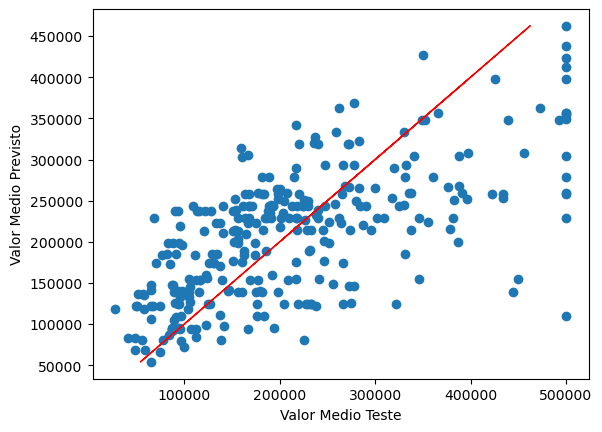

In [55]:
###############################
# Plotando Graficos
#Vou usar um pedaço randomico do resultado para conseguir visualizar melhor
###############################

num_linhas = 300
s_resultado = resultado_final.sample(n=num_linhas)

# Plot outputs
plt.scatter(s_resultado['Y_test'],s_resultado['Y_pred'])
plt.plot(s_resultado['Y_pred'], s_resultado['Y_pred'], color="red", linewidth=1)

#plt.xticks((s_resultado['Y_test']))
#plt.yticks((s_resultado['Y_pred']))

plt.xlabel('Valor Medio Teste')
plt.ylabel('Valor Medio Previsto')
plt.show()

In [52]:
s_resultado

,Y_pred,Y_test,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
166,266623.405068,209200.0,4,0,4,4,0,0,0,1,2
170,153344.725014,189400.0,4,0,4,4,0,0,0,0,1
1636,68445.650217,105000.0,4,4,1,4,0,0,0,0,2
2718,243434.179441,316000.0,4,0,3,4,0,0,0,1,1
618,412818.528636,500001.0,4,2,2,4,0,0,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...
1102,138928.194829,127300.0,4,0,3,4,0,0,0,0,1
855,138928.194829,104600.0,4,0,3,4,0,0,0,0,1
291,253313.871368,297800.0,4,2,3,4,0,0,0,1,5
321,198162.724670,248600.0,4,2,1,4,0,0,0,1,2
